In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge 
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
data=pd.read_csv("imdb-movie-prediction.csv", encoding='ISO-8859-1')
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [10]:
data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [11]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


<Axes: xlabel='Rating', ylabel='Count'>

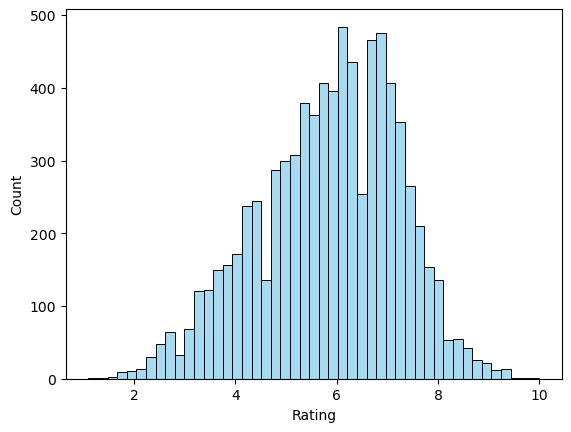

In [57]:
import seaborn as sns
sns.histplot(data['Rating'],color='skyblue', edgecolor='black')

<Axes: xlabel='Rating'>

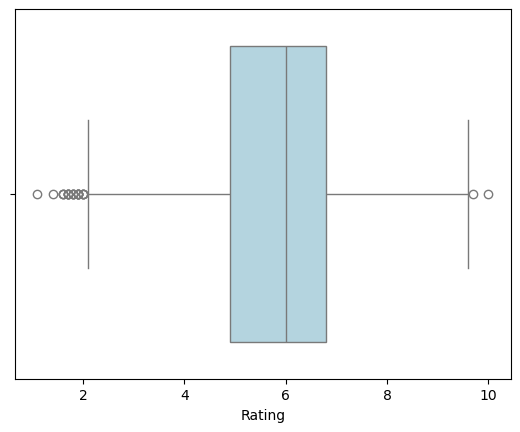

In [58]:
sns.boxplot(x='Rating', data=data, color='lightblue')

In [14]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [15]:
data.dropna()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [17]:
data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [20]:
data["Genre"] = data["Genre"].fillna("Unknown")
data["Director"] = data["Director"].fillna("Unknown")
data["Actor 1"] = data["Actor 1"].fillna("Unknown")
data["Actor 2"] = data["Actor 2"].fillna("Unknown")
data["Actor 3"] = data["Actor 3"].fillna("Unknown")
data["Rating"] = data["Rating"].fillna(data["Rating"].mean())

In [26]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,[Drama],5.841621,NaN,1926,2250,800,3108
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,[Drama],7.000000,8,1548,3280,4791,527
2,#Homecoming,(2021),90 min,"[Drama, Musical]",5.841621,NaN,5123,3713,2866,3450
3,#Yaaram,(2019),110 min,"[Comedy, Romance]",4.400000,35,3319,2917,1504,4020
4,...And Once Again,(2010),105 min,[Drama],5.841621,NaN,385,3112,3462,405
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,[Action],4.600000,11,2690,2586,4299,4262
15505,Zulmi,(1999),129 min,"[Action, Drama]",4.500000,655,2499,227,4532,519
15506,Zulmi Raj,(2005),NaN,[Action],5.841621,NaN,2424,3609,4558,4481
15507,Zulmi Shikari,(1988),NaN,[Action],5.841621,NaN,5549,4388,4558,4481


In [40]:
data['Genre'] = data['Genre'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(data['Genre'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

label_enc = LabelEncoder()

data['Director'] = label_enc.fit_transform(data['Director'])
data['Actor 1'] = label_enc.fit_transform(data['Actor 1'])
data['Actor 2'] = label_enc.fit_transform(data['Actor 2'])
data['Actor 3'] = label_enc.fit_transform(data['Actor 3'])

X= pd.concat([genre_df, data[['Director', 'Actor 1', 'Actor 2', 'Actor 3']]], axis=1)

y= data['Rating']

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
train_data= X_train.join(y_train)
train_data

,Director,Actor 1,Actor 2,Actor 3,Rating
8264,2473,2946,4209,4481,5.841621
12480,855,181,1397,3901,7.300000
10838,1881,3996,152,4132,7.600000
12841,2484,1866,2535,3633,6.000000
14771,4615,2018,4245,1081,5.100000
...,...,...,...,...,...
9949,4159,2705,4558,4481,5.841621
2162,446,2899,999,3463,5.500000
15175,4661,3668,3009,754,5.841621
953,2854,1020,681,1969,5.841621


In [41]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
X_train,y_train=train_data[["Director","Actor 1","Actor 2","Actor 3"]],train_data["Rating"]
model.fit(X_train,y_train)

LinearRegression()

In [42]:
y_pred=model.predict(X_test)

In [43]:
y_pred

array([5.82390978, 5.90215559, 5.80611386, ..., 5.85300347, 5.77717268,
       5.82231624])

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE =  mean_squared_error(y_test, y_pred) 
MAE = mean_absolute_error(y_test, y_pred)
R2_Score = r2_score(y_test, y_pred)

print('Mean squared error value is: ', MSE)
print('Mean absolute error value is: ', MAE)
print('R2 score value is: ', R2_Score)

Mean squared error value is:  0.9787144395700034
Mean absolute error value is:  0.5948256034735141
R2 score value is:  5.1068246361585246e-05


In [51]:
y_test

14034    6.400000
8648     5.841621
4848     8.000000
3411     5.841621
8181     2.400000
           ...   
9877     6.300000
10949    5.841621
13648    6.900000
15195    5.000000
10669    5.841621
Name: Rating, Length: 3102, dtype: float64

In [50]:
data = { 'Director': [2931] ,'Actor 1': [3502],'Actor 2':[3040] ,'Actor 3':[791]}
trial_data = pd.DataFrame(data)
# Predict rating using trial data
predict_rating = model.predict(trial_data)
print('Predicted Rating for trial data: ',predict_rating[0])

Predicted Rating for trial data:  5.823909781670479
